In [86]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
s01_summery_pkls = glob.glob("./S01_summerys/*")

In [87]:
# reference 
baseline_hn = {'pump': {'00': 0.58,'02': 0.52 },
               'valve': {'00': 0.62,'02': 0.57 },
               'fan': {'00': 0.57,'02': 0.68 },
               'slider': {'00': 0.93,'02': 0.74 },
           }

In [88]:

for i,pkl in enumerate(s01_summery_pkls):
    if i ==0:
        df = pd.read_pickle(pkl)
    else:
        df_temp =  pd.read_pickle(pkl)
        df = df.join(df_temp)
    
df.columns

Index(['KNC_fan006dBPSD_raw', 'KNC_fan006dBPSD_den', 'KNCn_fan006dBPSD_bssm',
       'KNCn_fan00min6dBPSD_raw', 'KNCn_fan00min6dBPSD_den',
       'logregp2_pump006dBPSD_raw', 'logregp2_pump006dBICA_demix',
       'logregpcap2_pump006dBMEL_raw', 'logregpcap2_pump006dBMEL_den',
       'logregpcap2_pump006dBMEL_denbssm',
       'logregpcap2_pump00min6dBMEL_denbssm',
       'logregpcap2_pump00min6dBMEL_den', 'logregpcap2_pump00min6dBPSD_raw',
       'logregpcap2_pump00min6dBPSD_den', 'logregpcap2_pump00min6dBPSD_bssm',
       'logregpcap2_pump00min6dBPSD_denbssm',
       'logregpcap2_pump02min6dBMEL_denbssm', 'logregp2_pump02min6dBPSD_raw',
       'logregp2_pump02min6dBPSD_den', 'logregp2_pump02min6dBPSD_bssm',
       'logregp2_pump02min6dBPSD_denbssm', 'logregpcafrp2_pump02min6dBMEL_den',
       'logregp2_pump026dBPSD_bssm', 'RFCn_fan006dBPSD_bssm',
       'RFCn_fan006dBPSD_den', 'RFCn_fan006dBPSD_raw',
       'RFCn_fan00min6dBPSD_raw', 'RFCn_fan00min6dBPSD_bssm',
       'RFCn_fan02min6dB

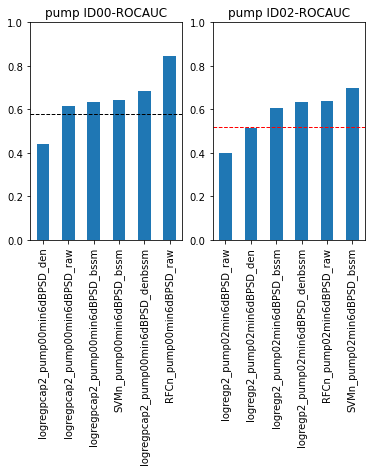

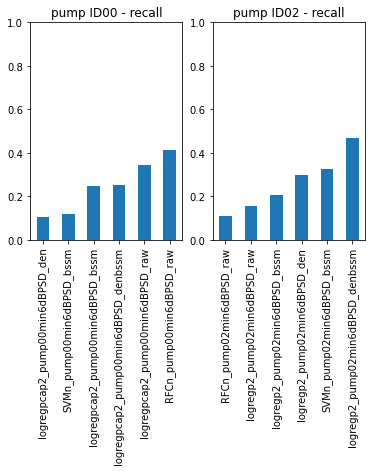

In [105]:
def col_filt(col,fw):
    return [c for c in col if fw in c]

def plot_it( m):
    plt.subplot(121)
    cols0 = col_filt(col_filt(df.columns,'min6dB'),m)
    cols0= col_filt(cols0,'00')
    cols0= col_filt(cols0,'PSD')
    df[cols0].loc['test  ROC-AUC'].sort_values().plot.bar()
    ref = baseline_hn[m]['00']
    plt.axhline(y=ref_0,linewidth=1, color='k', linestyle='--')
    plt.ylim([0,1.0])
    plt.title(m+' ID00-ROCAUC')
    
    #--
    plt.subplot(122)
    cols2 = col_filt(col_filt(df.columns,'min6dB'),m)
    cols2= col_filt(cols2,'02')
    cols2= col_filt(cols2,'PSD')
    df[cols2].loc['test  ROC-AUC'].sort_values().plot.bar()
    ref = baseline_hn[m]['02']
    plt.axhline(y=ref,linewidth=1, color='r', linestyle='--')
    plt.ylim([0,1.0])
    plt.title(m+' ID02-ROCAUC')
    
    plt.show()
    #---
    plt.subplot(121)
    
    df[cols0].loc['test  recall'].sort_values().plot.bar()
    #ref = baseline_hn[m]['00']
    #plt.axhline(y=ref_0,linewidth=1, color='k', linestyle='--')
    plt.ylim([0,1.0])
    plt.title(m+' ID00 - recall')
    #-
    plt.subplot(122)
    
    df[cols2].loc['test  recall'].sort_values().plot.bar()
    #ref = baseline_hn[m]['00']
    #plt.axhline(y=ref_0,linewidth=1, color='k', linestyle='--')
    plt.ylim([0,1.0])
    plt.title(m+' ID02 - recall')
    plt.show()
    return cols0, cols2
    


cols0, cols2 = plot_it('pump')


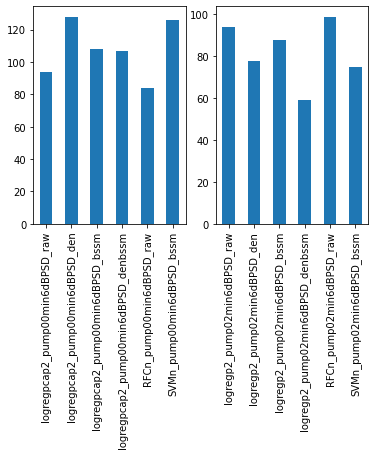

In [106]:
def plot_missed(cols0,cols2):
    
    plt.subplot(121)
    df[cols0].loc['FN - missed'].plot.bar()
    plt.subplot(122)
    df[cols2].loc['FN - missed'].plot.bar()


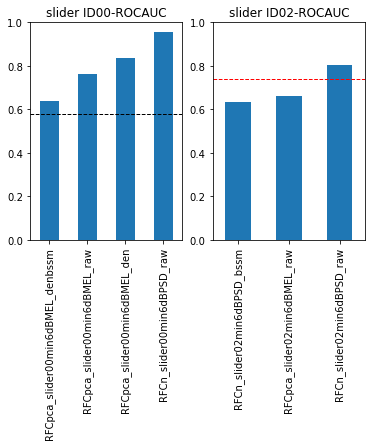

(['RFCn_slider00min6dBPSD_raw',
  'RFCpca_slider00min6dBMEL_denbssm',
  'RFCpca_slider00min6dBMEL_raw',
  'RFCpca_slider00min6dBMEL_den'],
 ['RFCn_slider02min6dBPSD_raw',
  'RFCn_slider02min6dBPSD_bssm',
  'RFCpca_slider02min6dBMEL_raw'])

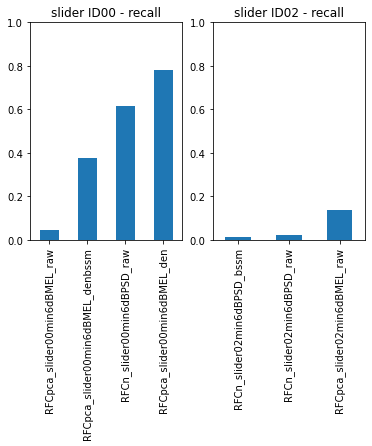

In [96]:
plot_it('slider')


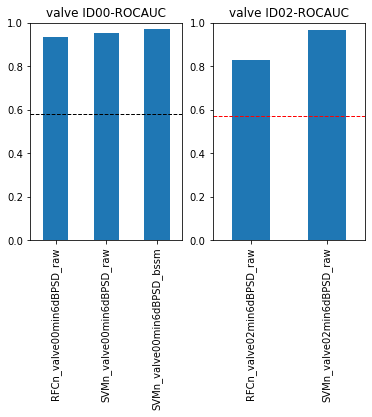

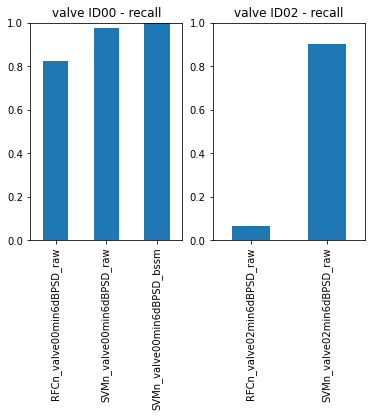

(['RFCn_valve00min6dBPSD_raw',
  'SVMn_valve00min6dBPSD_raw',
  'SVMn_valve00min6dBPSD_bssm'],
 ['RFCn_valve02min6dBPSD_raw', 'SVMn_valve02min6dBPSD_raw'])

In [107]:
plot_it('valve')

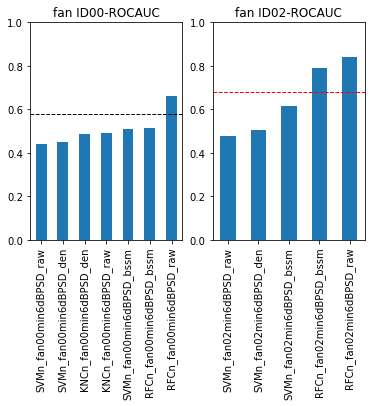

(['KNCn_fan00min6dBPSD_raw',
  'KNCn_fan00min6dBPSD_den',
  'RFCn_fan00min6dBPSD_raw',
  'RFCn_fan00min6dBPSD_bssm',
  'SVMn_fan00min6dBPSD_raw',
  'SVMn_fan00min6dBPSD_bssm',
  'SVMn_fan00min6dBPSD_den'],
 ['RFCn_fan02min6dBPSD_raw',
  'RFCn_fan02min6dBPSD_bssm',
  'SVMn_fan02min6dBPSD_raw',
  'SVMn_fan02min6dBPSD_bssm',
  'SVMn_fan02min6dBPSD_den'])

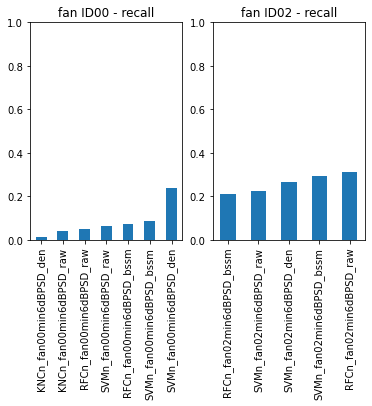

In [97]:
plot_it('fan')

This spot checking of combinations can be fast forward analysed that 
SVMs on PSD_raw or PSD_bssm and RFC ond PSD_raw are most promissing, 
While MEL versions don't bring better results do to the way the augmenting is done 
in the simple form right now.. going forward to step 2 with the most promesing tech.
